In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# loading the data from csv file to a pandas Dataframe
skt_data=pd.read_csv("skt_Diabetes.csv")
skt_data

,Gender,Age,Blood Sugar Fasting,Blood Sugar PP,HbA1C,Outcome
0,F,74,244.5,213.9,6.11,Diabetes
1,F,38,223.5,304.8,6.96,Diabetes
2,F,62,131.5,207.3,7.02,Diabetes
3,M,72,131.3,247.6,6.66,Diabetes
4,F,54,214.3,338.8,11.06,Diabetes
...,...,...,...,...,...,...
4012,F,75,120.0,221.8,6.80,Diabetes
4013,F,36,92.0,99.4,4.19,Normal
4014,M,59,107.0,179.0,4.90,Normal
4015,F,50,99.0,198.0,4.20,Normal


In [5]:
# number of rows and Columns in this dataset
skt_data.shape

(4017, 6)

In [9]:
skt_data['Outcome'].value_counts()

Outcome
0    2195
1    1678
2     144
Name: count, dtype: int64

In [10]:
skt_data.isnull().sum()


Gender                 0
Age                    0
Blood Sugar Fasting    0
Blood Sugar PP         0
HbA1C                  0
Outcome                0
dtype: int64

In [8]:
le_encode = LabelEncoder()
skt_data['Gender'] = le_encode.fit_transform(skt_data['Gender'])
skt_data['Outcome'] = le_encode.fit_transform(skt_data['Outcome'])
skt_data

,Gender,Age,Blood Sugar Fasting,Blood Sugar PP,HbA1C,Outcome
0,0,74,244.5,213.9,6.11,0
1,0,38,223.5,304.8,6.96,0
2,0,62,131.5,207.3,7.02,0
3,1,72,131.3,247.6,6.66,0
4,0,54,214.3,338.8,11.06,0
...,...,...,...,...,...,...
4012,0,75,120.0,221.8,6.80,0
4013,0,36,92.0,99.4,4.19,1
4014,1,59,107.0,179.0,4.90,1
4015,0,50,99.0,198.0,4.20,1


In [11]:
print(skt_data['Outcome'].value_counts())

Outcome
0    2195
1    1678
2     144
Name: count, dtype: int64


 **Train Test Spliting**

In [12]:
X = skt_data.drop('Outcome', axis=1)  # features: Gender, Age, Blood Sugar, etc.
y = skt_data['Outcome']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MLP Classifier

In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
mlp.fit(X_train, y_train)


MLPClassifier(max_iter=300)

**Model Traning**

Train Data: (3213, 5)
Outcome
0    1758
1    1336
2     119
Name: count, dtype: int64


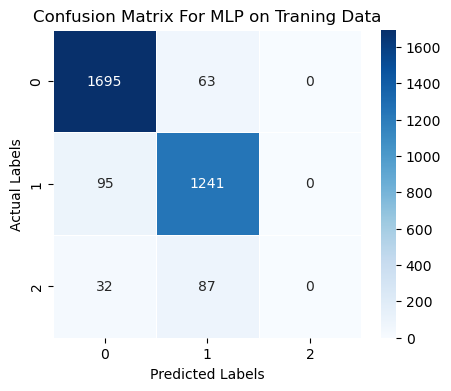

Accuracy: 0.91
Precision: 0.88
Recall: 0.91
F1 Score: 0.90


In [22]:
print(f"Train Data: {X_train.shape}")
print(y_train.value_counts())

mlp_y_pred = mlp.predict(X_train)

cm = confusion_matrix(y_train, mlp_y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For MLP on Traning Data')

plt.show()

mlp_train_accuracy = accuracy_score(y_train, mlp_y_pred)
mlp_train_precision = precision_score(y_train, mlp_y_pred,average='weighted')
mlp_train_recall = recall_score(y_train, mlp_y_pred,average='weighted')
mlp_train_f1 = f1_score(y_train, mlp_y_pred,average='weighted')

print(f'Accuracy: {mlp_train_accuracy:.2f}')
print(f'Precision: {mlp_train_precision:.2f}')
print(f'Recall: {mlp_train_recall:.2f}')
print(f'F1 Score: {mlp_train_f1:.2f}')

**Model Testing**

Test Data: (804, 5)
Outcome
0    437
1    342
2     25
Name: count, dtype: int64


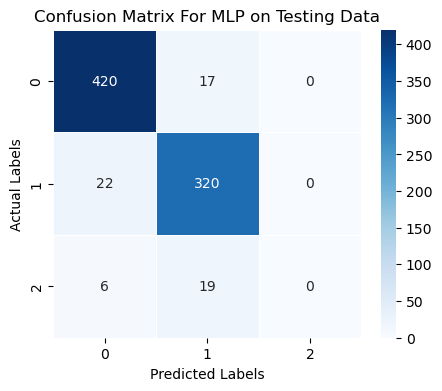

Accuracy: 0.92
Precision: 0.89
Recall: 0.92
F1 Score: 0.91


In [23]:
print(f"Test Data: {X_test.shape}")
print(y_test.value_counts())

mlp_test_pred = mlp.predict(X_test)


cm = confusion_matrix(y_test, mlp_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, square=True)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix For MLP on Testing Data')

plt.show()

mlp_test_accuracy = accuracy_score(y_test, mlp_test_pred)
mlp_test_precision = precision_score(y_test, mlp_test_pred,average='weighted')
mlp_test_recall = recall_score(y_test, mlp_test_pred,average='weighted')
mlp_test_f1 = f1_score(y_test, mlp_test_pred,average='weighted')

print(f'Accuracy: {mlp_test_accuracy:.2f}')
print(f'Precision: {mlp_test_precision:.2f}')
print(f'Recall: {mlp_test_recall:.2f}')
print(f'F1 Score: {mlp_test_f1:.2f}')